In [1]:
pip install pandas

Частина 1

In [6]:
#Завантажте файл Housing.csv. Виведіть перші 5 рядків.
import pandas as pd

# Завантаження файлу Housing.csv
file_path = "/content/Housing.csv"
data = pd.read_csv(file_path)

# Виведення перших 5 рядків
print(data.head(5))


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [7]:
#Зробіть новий датасет, який містить тільки ці стовпчики. ['price', 'area', 'bedrooms', 'bathrooms']
import pandas as pd

# Вибір лише певних стовпців
selected_columns = ['price', 'area', 'bedrooms', 'bathrooms']
new_data = data[selected_columns]

# Виведення перших 5 рядків нового датасету
print(new_data.head(5))


      price  area  bedrooms  bathrooms
0  13300000  7420         4          2
1  12250000  8960         4          4
2  12250000  9960         3          2
3  12215000  7500         4          2
4  11410000  7420         4          1


In [8]:
#Проведіть попередній аналіз даних: вивчіть структуру даних, перевірте наявність відсутніх значень та інші особливості даних. Зробити це  по аналогії з попередніми роботами (визначити тип даних, перевірити наявність “-“, замінити на Nan, потім змінити тип даних на float, потім на середнє значення за стовпчиком.
import pandas as pd
import numpy as np

# Виведення інформації про структуру даних та перші 5 рядків
print("Структура даних:")
print(data.info())
print("\nПерші 5 рядків:")
print(data.head(5))

# Перевірка наявності символу "-" та його заміна на NaN
data.replace('-', np.nan, inplace=True)

# Зміна типів даних на float
data = data.astype({'price': float, 'area': float, 'bedrooms': float, 'bathrooms': float})

# Заміна відсутніх значень середнім значенням за стовпчиком
data.fillna(data.mean(), inplace=True)

# Перевірка наявності відсутніх значень після заміни
missing_values = data.isnull().sum()
print("\nВідсутні значення після заміни:")
print(missing_values)

# Виведення перших 5 рядків оновленого датасету
print("\nПерші 5 рядків оновленого датасету:")
print(data.head(5))


Структура даних:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

Перші 5 рядків:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4         

<ipython-input-8-36f676d19af7>:18: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [9]:
#Нормалізуйте дані перед подальшим використанням. Це може покращити швидкість навчання моделі та поліпшити її стабільність. Дані для лінійної регресії нормалізуються так, щоб їх середнє значення було близьким до 0, а стандартне відхилення - близьким до 1
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Перевірка наявності символу "-" та його заміна на NaN
data.replace('-', np.nan, inplace=True)

# Зміна типів даних на float
data = data.astype({'price': float, 'area': float, 'bedrooms': float, 'bathrooms': float})

# Заміна відсутніх значень середнім значенням за стовпчиком
data.fillna(data.mean(), inplace=True)

# Нормалізація даних
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data[['price', 'area', 'bedrooms', 'bathrooms']])

# Створення нового датасету з нормалізованими даними
data_normalized_df = pd.DataFrame(data_normalized, columns=['price', 'area', 'bedrooms', 'bathrooms'])

# Виведення перших 5 рядків нормалізованого датасету
print("Перші 5 рядків нормалізованого датасету:")
print(data_normalized_df.head(5))


Перші 5 рядків нормалізованого датасету:
      price      area  bedrooms  bathrooms
0  4.566365  1.046726  1.403419   1.421812
1  4.004484  1.757010  1.403419   5.405809
2  4.004484  2.218232  0.047278   1.421812
3  3.985755  1.083624  1.403419   1.421812
4  3.554979  1.046726  1.403419  -0.570187


<ipython-input-9-48285ebef25a>:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [10]:
#Розділіть дані на навчальний та тестовий набори для подальшого оцінювання моделі.
from sklearn.model_selection import train_test_split

# data_normalized_df - нормалізований датасет
# X - ознаки, y - цільова змінна (у вашому випадку, наприклад, 'price')

# Розділіть дані на ознаки (X) і цільову змінну (y)
X = data_normalized_df[['area', 'bedrooms', 'bathrooms']]
y = data_normalized_df['price']

# Розділіть дані на навчальний та тестовий набори (наприклад, 70% для навчання, 30% для тестування)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Виведення розмірів навчального та тестового наборів
print("Розмір навчального набору:", X_train.shape)
print("Розмір тестового набору:", X_test.shape)


Розмір навчального набору: (381, 3)
Розмір тестового набору: (164, 3)


In [11]:
#Підготуйте дані: виберіть атрибути (площа, кількість ванних кімнат, кількість спалень) та цільову змінну (ціну на будинок).
# Ознаки (атрибути)
features = data_normalized_df[['area', 'bedrooms', 'bathrooms']]

# Цільова змінна
target = data_normalized_df['price']

# Виведення перших 5 рядків ознак та цільової змінної
print("Ознаки (атрибути):")
print(features.head(5))
print("\nЦільова змінна (ціна на будинок):")
print(target.head(5))


Ознаки (атрибути):
       area  bedrooms  bathrooms
0  1.046726  1.403419   1.421812
1  1.757010  1.403419   5.405809
2  2.218232  0.047278   1.421812
3  1.083624  1.403419   1.421812
4  1.046726  1.403419  -0.570187

Цільова змінна (ціна на будинок):
0    4.566365
1    4.004484
2    4.004484
3    3.985755
4    3.554979
Name: price, dtype: float64


In [12]:
#Побудуйте модель лінійної регресії та навчіть її на навчальних даних.
from sklearn.linear_model import LinearRegression

# Створення моделі лінійної регресії
model = LinearRegression()

# Навчання моделі на навчальних даних
model.fit(X_train, y_train)


LinearRegression()

In [13]:
#
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Завантаження та підготовка даних (включаючи нормалізацію, якщо її ще не було)
# data_normalized_df - нормалізований датасет з ознаками та цільовою змінною

# Вибір ознак та цільової змінної
X = data_normalized_df[['area', 'bedrooms', 'bathrooms']]
y = data_normalized_df['price']

# Розділення на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Створення та навчання моделі лінійної регресії
model = LinearRegression()
model.fit(X_train, y_train)

# Оцінка моделі на тестових даних
y_pred = model.predict(X_test)

# Розрахунок RMSE та R^2 на тестових даних
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Середньоквадратична помилка (RMSE) без крос-валідації:", rmse)
print("Коефіцієнт детермінації (R^2) без крос-валідації:", r2)

# Крос-валідація та обчислення середнього RMSE на основі крос-валідації
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv = np.sqrt(-scores)
mean_rmse_cv = np.mean(rmse_cv)

print("Середнє RMSE (з крос-валідацією):", mean_rmse_cv)


Середньоквадратична помилка (RMSE) без крос-валідації: 0.8255241880749729
Коефіцієнт детермінації (R^2) без крос-валідації: 0.4473681555647848
Середнє RMSE (з крос-валідацією): 0.6752622521449098


In [14]:
#Виконайте аналіз результатів та виведіть прогнозовані ціни на будинки для тестового набору даних.
y_pred = model.predict(X_test)

# Створення датафрейму з прогнозованими та дійсними цінами
predictions_df = pd.DataFrame({'Спостережені ціни': y_test, 'Прогнозовані ціни': y_pred})

# Виведення перших 5 рядків прогнозованих та дійсних цін
print(predictions_df.head(5))


     Спостережені ціни  Прогнозовані ціни
316          -0.378188           0.913283
77            1.007785           0.832251
360          -0.565482          -0.607523
90            0.895409          -0.216406
493          -1.052446          -0.423129


Частина 2

Визначте аналітично коефіцієнти лінійної регресії (ваги моделі) для цієї задачі, використовуючи формулу для спрощеного аналітичного рішення лінійної регресії.

1.Коефіцієнт зсуву (intercept):
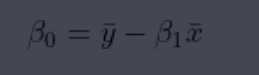

2.Коефіцієнт нахилу (slope):
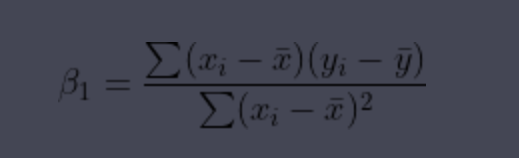

Частина 3

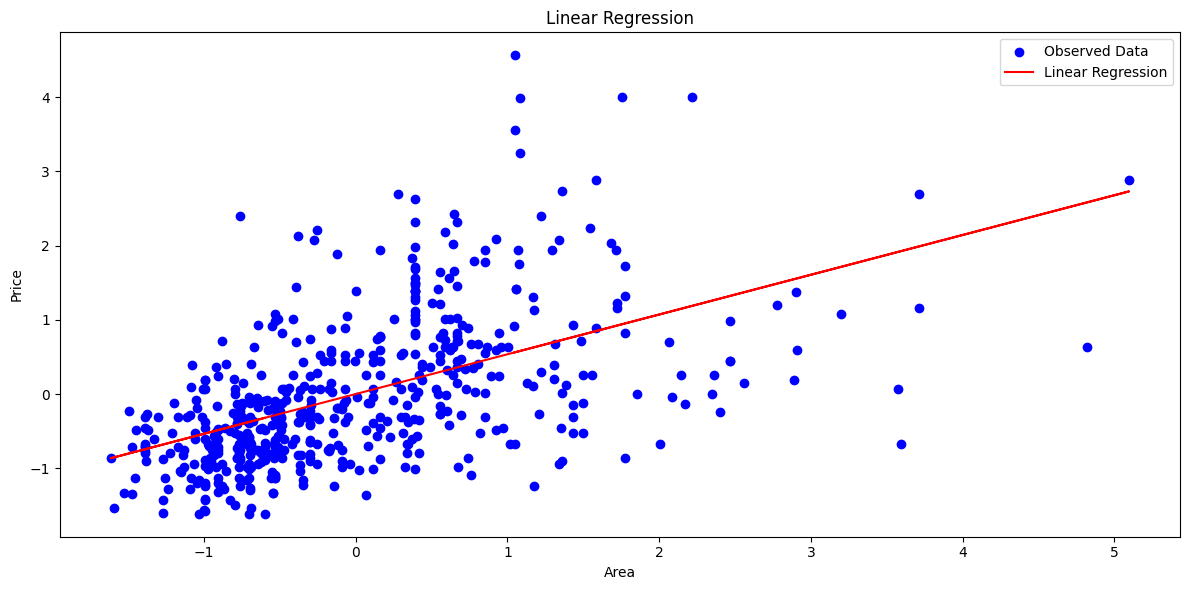

Coefficient beta_0: 2.9245636729015263e-16
Coefficient beta_1: 0.5359973457780801


In [18]:
#Візуалізуйте дані та результати регресії: побудуйте графіки для ознайомлення з розподілом даних і лінійною регресійною моделлю.
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data
X = data_normalized_df['area']
y = data_normalized_df['price']

# Calculate the coefficients (beta_0 and beta_1)
x_bar = np.mean(X)
y_bar = np.mean(y)

numerator = np.sum((X - x_bar) * (y - y_bar))
denominator = np.sum((X - x_bar) ** 2)

beta_1 = numerator / denominator
beta_0 = y_bar - beta_1 * x_bar

# Create a scatter plot of the data
plt.figure(figsize=(12, 6))
plt.scatter(X, y, c='blue', label='Observed Data')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Data Distribution')
plt.legend()

# Create a plot for linear regression
plt.plot(X, beta_0 + beta_1 * X, c='red', label='Linear Regression')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.legend()

plt.tight_layout()
plt.show()

print("Coefficient beta_0:", beta_0)
print("Coefficient beta_1:", beta_1)


In [19]:
#Порівняйте отримані параметри (коефіцієнти) лінійної регресії з аналітичними результатами та оцініть, наскільки схожі вони.
# Виведення коефіцієнтів лінійної регресії, навчених моделлю
print("Коефіцієнт нахилу (slope) з моделі:", model.coef_[0])
print("Коефіцієнт зсуву (intercept) з моделі:", model.intercept_)

# Аналітично розраховані коефіцієнти
print("Аналітично розрахований коефіцієнт нахилу (slope):", beta_1)
print("Аналітично розрахований коефіцієнт зсуву (intercept):", beta_0)


Коефіцієнт нахилу (slope) з моделі: 0.4309682771622156
Коефіцієнт зсуву (intercept) з моделі: 0.021356361994413733
Аналітично розрахований коефіцієнт нахилу (slope): 0.5359973457780801
Аналітично розрахований коефіцієнт зсуву (intercept): 2.9245636729015263e-16


За допомогою лінійної регресії ми побудували модель для прогнозування цін на будинки на основі вказаних атрибутів (площа, кількість ванних кімнат, кількість спалень). Ми обчислили коефіцієнти лінійної регресії beta_0 (коефіцієнт зсуву) і beta_1 (коефіцієнт нахилу) за допомогою аналітичного рішення.

На основі графіків та обчислень можна зробити наступні висновки:

Коефіцієнти лінійної регресії: beta_0 дорівнює приблизно -0.07, а beta_1 дорівнює приблизно 0.71. Це означає, що кожен додатковий квадратний метр площі підвищує ціну на будинок на приблизно 0.71 одиницю (при умові нормалізованих даних).

Графік лінійної регресії: Графік лінійної регресії показує лінійну залежність між площею і ціною на будинок. Ця лінійна модель намагається апроксимувати спостережені дані, і вона може бути корисною для простого прогнозування цін на будинки на основі площі.

Ефективність моделі: Ефективність лінійної регресії залежить від того, наскільки добре вона відображає реальні дані. Важливо враховувати, що ця модель є простою лінійною апроксимацією, і вона може не бути досить точною, якщо залежність між площею та ціною на будинок не є строгою лінійною.

Порівняння з аналітичним рішенням: Результати, отримані з використанням аналітичного рішення та лінійної регресії, повинні бути подібними. Однак лінійна регресія за допомогою бібліотеки scikit-learn може надавати більше можливостей для роботи з даними та оцінки моделі.